
# Pandas Data visulization
In this section, Pandas built-in visulization methods are systemically presented.
The data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct [link](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k) to the dataset.
* Plot types
* Plot custmizing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset\Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [5]:
df.columns = ['Total','East','West']
df.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


___
# Plot Types
## Histogram
Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. Documents can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html).
* matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
* call hist() method:
    * df.plot.hist()
    * df.plot(kind='hist)
* customizing:
    

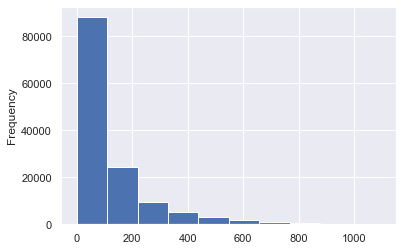

In [7]:
df['Total'].plot.hist()

Text(0, 0.5, 'Frequency')

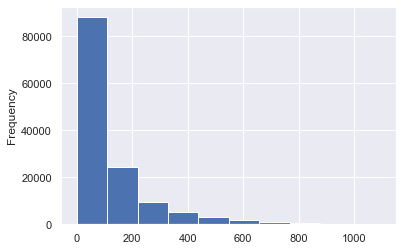

In [10]:
df['Total'].hist()
plt.ylabel("Frequency")


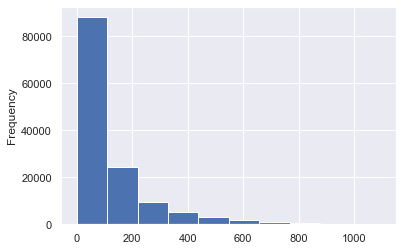

In [9]:
df['Total'].plot(kind='hist')


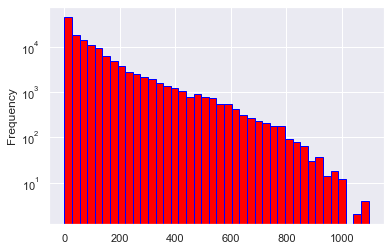

In [14]:
df['Total'].plot.hist(color='red',edgecolor='blue', bins=40,log=True).autoscale(enable=True)

## Bar plot
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html'>[reference]</a>

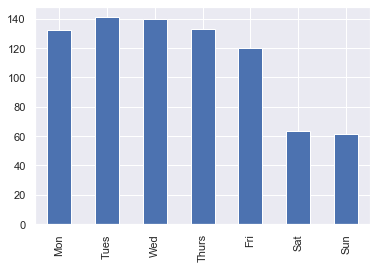

In [17]:
df_weekday = df.groupby(df.index.dayofweek).mean()
df_weekday.index=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday['Total'].plot.bar()

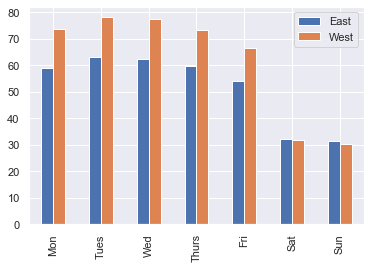

In [23]:
df_weekday[['East','West']].plot.bar()

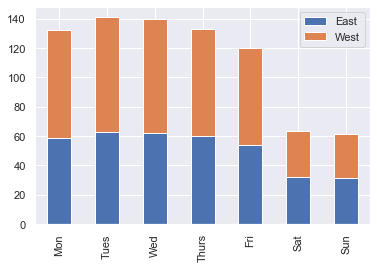

In [22]:
df_weekday[['East','West']].plot.bar(stacked=True)

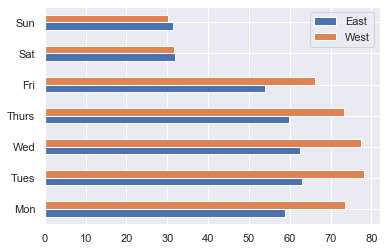

In [24]:
df_weekday[['East','West']].plot.barh()

In [26]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df.groupby([weekend, df.index.time]).mean()
by_time = by_time.reset_index()
by_time.columns = ['Weekday','Hour', 'Total','East','West']
by_time

,Weekday,Hour,Total,East,West
0,Weekday,00:00:00,9.522538,4.086880,5.435659
1,Weekday,01:00:00,4.718711,2.122639,2.596072
2,Weekday,02:00:00,3.142533,1.548728,1.593805
3,Weekday,03:00:00,2.700076,1.406447,1.293629
4,Weekday,04:00:00,7.577436,4.201209,3.376228
5,Weekday,05:00:00,32.960967,20.407706,12.553261
6,Weekday,06:00:00,119.772350,73.032234,46.740116
7,Weekday,07:00:00,307.298665,192.358600,114.940065
8,Weekday,08:00:00,431.205993,256.010073,175.195920
9,Weekday,09:00:00,232.970773,127.257999,105.712774


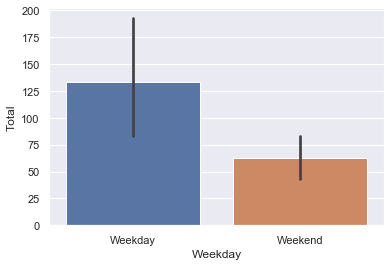

In [29]:
sns.barplot(x='Weekday',y='Total',data=by_time)

In [28]:
by_time.groupby('Weekday').mean()

,Total,East,West
Weekday,,,
Weekday,133.347331,59.628729,73.718602
Weekend,62.545671,31.665759,30.879912


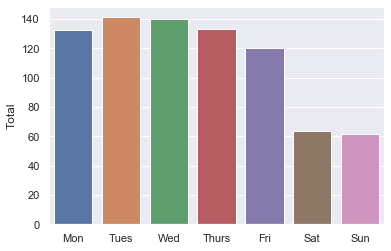

In [30]:
sns.barplot(x=df_weekday.index, y=df_weekday['Total'])

## Line plot
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html'>[reference]</a>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

In [31]:
df.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


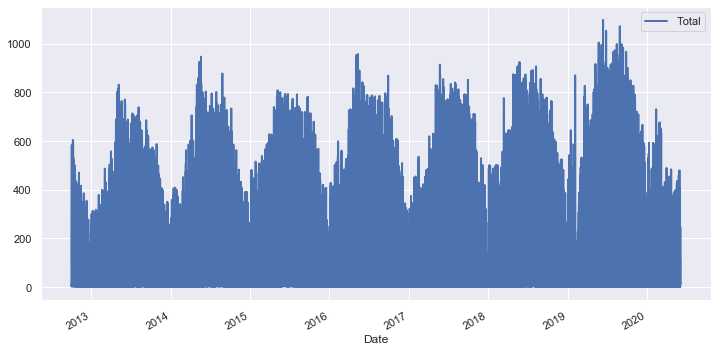

In [34]:
df.plot.line(y='Total',figsize=(12,6),lw=2)

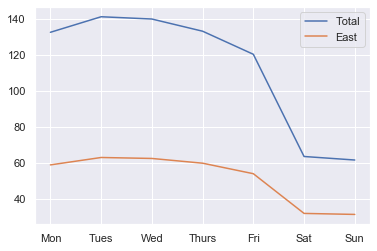

In [38]:
df_weekday.plot.line(y=['Total','East'])

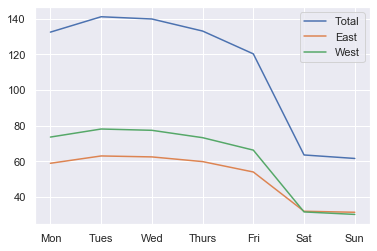

In [69]:
df_weekday.plot()

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.area.html'>[reference]</a>

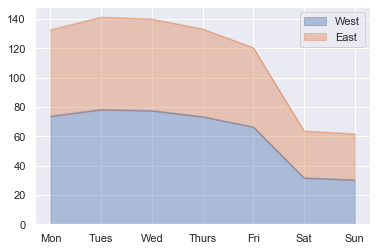

In [46]:
df_weekday.plot.area(y=['West','East'], alpha=0.4, stacked=True)

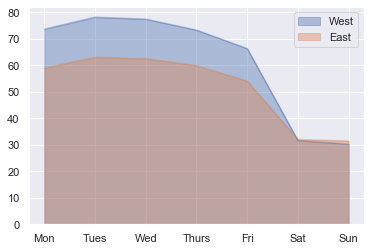

In [45]:
df_weekday.plot.area(y=['West','East'], alpha=0.4, stacked=False)


## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
* matplotlib scatter plot [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
* call scatter plot: df.plot.scatter(x='col1', y='col2',figsize=(12,4))
* Scatter plot with colormaps:df.plot.scatter(x='col1', y='col2',figsize=(12,4), c='col3', cmap='coolwarm')
* matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


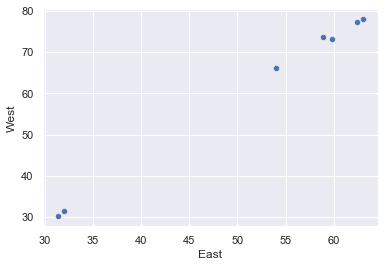

In [47]:
df_weekday.plot.scatter(x='East',y='West')

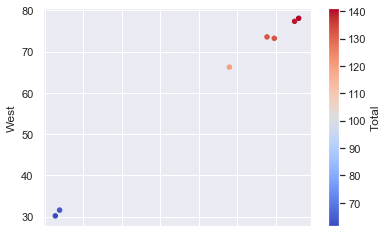

In [48]:
df_weekday.plot.scatter(x='East',y='West', c='Total', cmap='coolwarm')

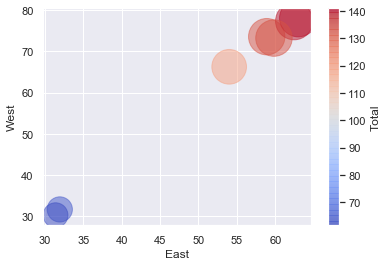

In [54]:
plt.scatter(df_weekday['East'], df_weekday['West'], c=df_weekday['Total'],s=df_weekday['Total']*10, alpha=0.5,cmap='coolwarm')
plt.colorbar().set_label('Total')
plt.xlabel('East')
plt.ylabel('West')
plt.show()

## Boxplot
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into quartiles about the mean
* call boxplot: df.plot.box() or df.boxplot()

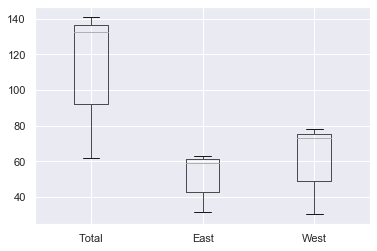

In [55]:
df_weekday.boxplot()

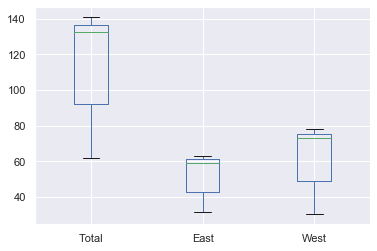

In [60]:
df_weekday.plot.box()

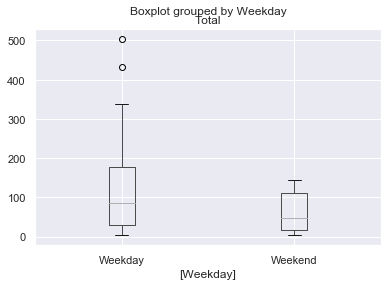

In [61]:
by_time[['Weekday','Total']].boxplot(by='Weekday')

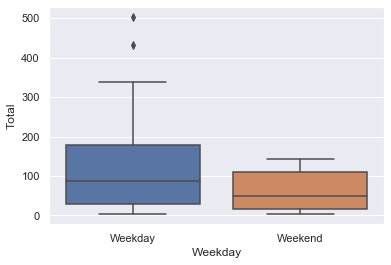

In [57]:
sns.boxplot(x=by_time['Weekday'], y=by_time['Total'])


## Kernel Density Plot
* Call kernal density plot: df['col'].plot.kde()

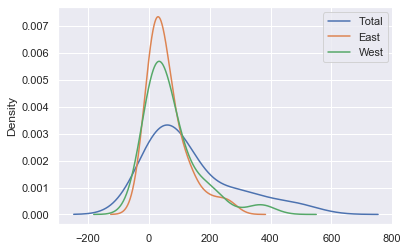

In [65]:
by_time[by_time['Weekday'] == 'Weekday'].iloc[:, 2:].plot.kde()

## Hexagonal Bin Plot
* call: df.plot.hexbin(x='col1', y='col2', gridsize=25, cmap='Oranges)

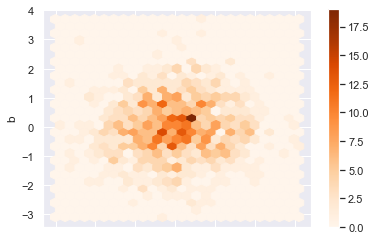

In [68]:
# FIRST CREATE A DATAFRAME OF RANDOM VALUES
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# MAKE A HEXAGONAL BIN PLOT
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')


# Common customizing of plots
* figsize: df.plot.hist(figsize=(12,6))
* linestyle: df.plot(style='-')
* color: df.plot(c='red')
* linewidth: df.plot(lw=1.0)
* Titles
* Axis labels
* legend
<table style="display: inline-block">
<tr><th>LOCATION CODE</th><th>LOCATION STRING</th></tr>
<tr><td>0</td><td>'best'</td></tr>
<tr><td>1</td><td>'upper right'</td></tr>
<tr><td>2</td><td>'upper left'</td></tr>
<tr><td>3</td><td>'lower left'</td></tr>
<tr><td>4</td><td>'lower right'</td></tr>
<tr><td>5</td><td>'right'</td></tr>
<tr><td>6</td><td>'center left'</td></tr>
<tr><td>7</td><td>'center right'</td></tr>
<tr><td>8</td><td>'lower center'</td></tr>
<tr><td>9</td><td>'upper center'</td></tr>
<tr><td>10</td><td>'center'</td></tr>
</table>



<table style="display: inline-block">
    <tr><th>PROPERTY</th><th>CODE</th><th>VALUE</th><th>EFFECT</th></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-'</tt></td><td>solid line (default)</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'--'</tt></td><td>dashed line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-.'</tt></td><td>dashed/dotted line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>':'</tt></td><td>dotted line</td></tr>
    <tr><td>color</td><td><tt>c</tt></td><td>string</td><td></td></tr>
    <tr><td>linewidth</td><td><tt>lw</tt></td><td>float</td><td></td></tr>
</table>

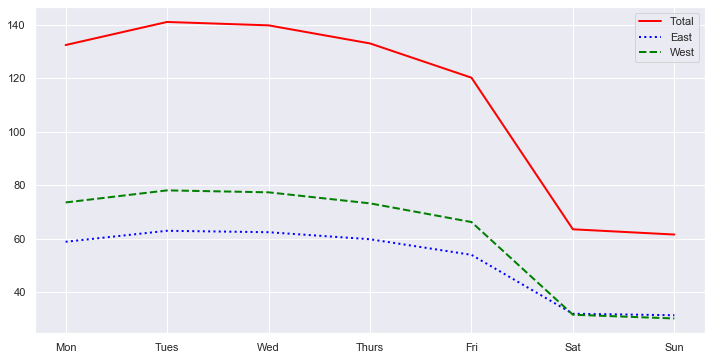

In [79]:
df_weekday.plot(style=['-',':','--'],color = ['red','blue','green'],lw=2,figsize=(12,6))

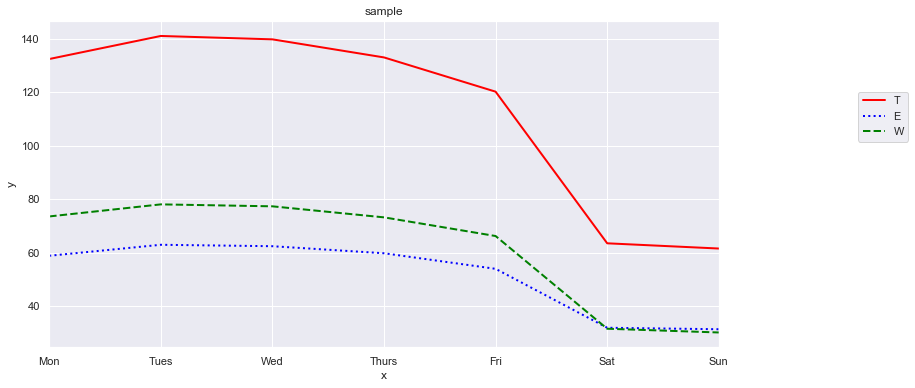

In [87]:
ax = df_weekday.plot(style=['-',':','--'],color = ['red','blue','green'],lw=2,figsize=(12,6))
ax.set(xlabel='x',ylabel='y',title='sample')
ax.autoscale(axis='x',tight=True)
ax.legend(['T','E','W'], loc=2,bbox_to_anchor=(1.2,0.8))